**Data Preprocessing Techniques**


**Data Cleaning**

Load the dataset: We'll upload the dataset file (train.csv).

Handle missing values: We'll identify and impute or drop missing values.

Handle duplicate entries: We'll check for and remove duplicates.

Outlier detection and handling: We'll detect and handle outliers.

Feature encoding: We'll encode categorical variables.

Feature scaling: We'll scale numerical variables for consistency.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Load the dataset
loan_data = pd.read_csv('/content/train.csv')

In [5]:
# Display first few rows of the dataset

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Display basic information about the dataset

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Generates descriptive statistics for numerical columns in the dataset.
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Step 1: Handle Missing Values

# Check for missing values

loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Impute missing values for numerical columns with median and categorical columns with most frequent
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

The code uses the SimpleImputer class from the sklearn.impute module to handle missing values in the dataset. Missing values in numerical columns are replaced with the median of that column, and missing values in categorical columns are replaced with the most frequent value (mode) of that column.

Two SimpleImputer objects are created:

num_imputer: For numerical columns, the strategy is set to 'median', meaning missing values will be replaced with the median value of the respective column.

cat_imputer: For categorical columns, the strategy is set to 'most_frequent', meaning missing values will be replaced with the most frequent (mode) value of the respective column.

In [11]:
loan_data['LoanAmount'] = num_imputer.fit_transform(loan_data[['LoanAmount']])
loan_data['Loan_Amount_Term'] = num_imputer.fit_transform(loan_data[['Loan_Amount_Term']])
loan_data['Credit_History'] = num_imputer.fit_transform(loan_data[['Credit_History']])


In [12]:
loan_data['Gender'] = cat_imputer.fit_transform(loan_data[['Gender']]).ravel()
loan_data['Married'] = cat_imputer.fit_transform(loan_data[['Married']]).ravel()
loan_data['Dependents'] = cat_imputer.fit_transform(loan_data[['Dependents']]).ravel()
loan_data['Self_Employed'] = cat_imputer.fit_transform(loan_data[['Self_Employed']]).ravel()

The ravel method is used to flatten the NumPy array into a 1-dimensional array. This is necessary because fit_transform returns a 2-dimensional array (even if it has only one column), and we want to assign a 1-dimensional array back to the DataFrame column.


In [13]:
# Verify if missing values are handled

loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Step 2: Handle Duplicate Entries
# Check for duplicate entries
loan_data.duplicated().sum()

0

In [15]:
# Remove duplicate entries if any
loan_data = loan_data.drop_duplicates()

In [16]:
loan_data.duplicated().sum()

0

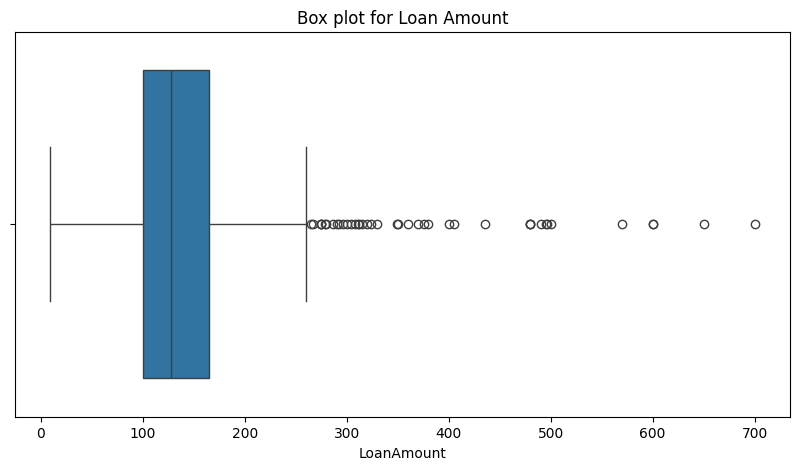

In [17]:
# Step 3: Outlier Detection and Handling
# Box plot for detecting outliers in 'LoanAmount'
plt.figure(figsize=(10, 5))
sns.boxplot(x=loan_data['LoanAmount'])
plt.title('Box plot for Loan Amount')
plt.show()

This code is designed to detect outliers in the LoanAmount column of the loan_data DataFrame using a box plot. Outliers are values that are significantly higher or lower than the rest of the data and can distort statistical analyses and machine learning models.

In [18]:
# Handle outliers (for example, using IQR method)
Q1 = loan_data['LoanAmount'].quantile(0.25)
Q3 = loan_data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

Q1 = loan_data['LoanAmount'].quantile(0.25)

This line calculates the first quartile (Q1) of the LoanAmount column. The first quartile represents the 25th percentile of the data, meaning that 25% of the data points are below this value.

Q3 = loan_data['LoanAmount'].quantile(0.75)

This line calculates the third quartile (Q3) of the LoanAmount column. The third quartile represents the 75th percentile of the data, meaning that 75% of the data points are below this value.

IQR = Q3 - Q1

The IQR is the difference between the third quartile (Q3) and the first quartile (Q1). It measures the spread of the middle 50% of the data. The IQR is used to determine the range within which the majority of the data points lie.

outlier_threshold_low = Q1 - 1.5 * IQR

This line calculates the lower bound for detecting outliers. Any data points below this threshold are considered outliers. The threshold is set to Q1 minus 1.5 times the IQR. This is a commonly used rule of thumb in statistics to identify lower outliers.

outlier_threshold_high = Q3 + 1.5 * IQR

This line calculates the upper bound for detecting outliers. Any data points above this threshold are considered outliers. The threshold is set to Q3 plus 1.5 times the IQR. This is a commonly used rule of thumb in statistics to identify upper outliers.

The code snippet calculates the first and third quartiles (Q1 and Q3) of the LoanAmount column to determine the interquartile range (IQR). It then sets thresholds for detecting outliers by extending 1.5 times the IQR below Q1 and above Q3. These thresholds help identify loan amounts that are significantly different from the majority of the data, allowing for further handling or removal of these outliers.


In [19]:
# Filter out outliers
loan_data = loan_data[(loan_data['LoanAmount'] >= outlier_threshold_low) & (loan_data['LoanAmount'] <= outlier_threshold_high)]


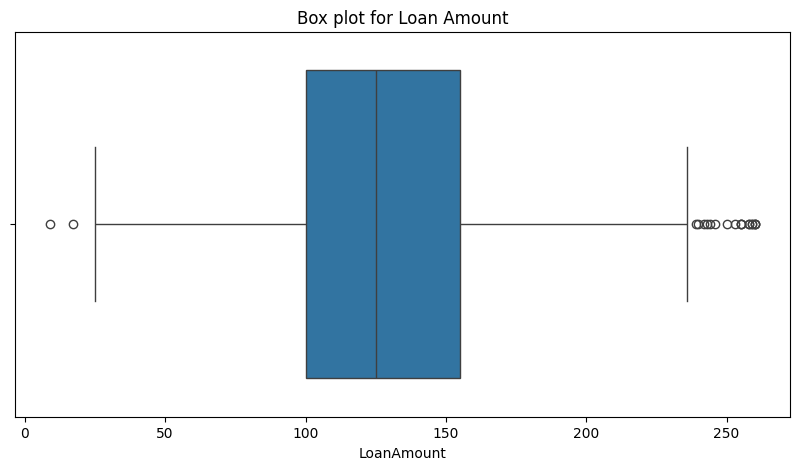

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=loan_data['LoanAmount'])
plt.title('Box plot for Loan Amount')
plt.show()

In [21]:
# Step 4: Encode Categorical Variables

# Identify categorical columns

categorical_cols = loan_data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    loan_data[col] = le.fit_transform(loan_data[col])
    label_encoders[col] = le

label_encoders = {}

This line creates an empty dictionary called label_encoders. This dictionary will store the LabelEncoder objects for each categorical column. Storing these encoders allows you to later convert the numerical labels back to their original categorical values if needed.



le = LabelEncoder()

For each categorical column, a new instance of the LabelEncoder class from the sklearn.preprocessing module is created. This encoder will be used to transform categorical data into numerical labels.


loan_data[col] = le.fit_transform(loan_data[col])

This line applies the label encoder to the current categorical column. The fit_transform method is used, which first fits the encoder to the unique values in the column and then transforms those values into numerical labels. The transformed numerical labels replace the original categorical values in the loan_data DataFrame.

In [23]:
# Display first few rows after encoding

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [24]:
# Step 5: Feature Scaling
# Identify numerical columns
numerical_cols = loan_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
# Standard scaling for numerical features
scaler = StandardScaler()
loan_data[numerical_cols] = scaler.fit_transform(loan_data[numerical_cols])

In [26]:

# Display first few rows after scaling
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-1.729031,0.47918,-1.350059,-0.718898,-0.549793,-0.382099,0.328911,-0.630154,-0.010433,0.271476,0.414462,1.224522,0.665827
1,-1.722985,0.47918,0.740708,0.300727,-0.549793,-0.382099,-0.018351,0.012474,-0.010433,0.271476,0.414462,-1.326937,-1.501893
2,-1.716940,0.47918,0.740708,-0.718898,-0.549793,2.617120,-0.452565,-0.630154,-1.348463,0.271476,0.414462,1.224522,0.665827
3,-1.710894,0.47918,0.740708,-0.718898,1.818865,-0.382099,-0.566948,0.374698,-0.183082,0.271476,0.414462,1.224522,0.665827
4,-1.704848,0.47918,-1.350059,-0.718898,-0.549793,-0.382099,0.370330,-0.630154,0.270122,0.271476,0.414462,1.224522,0.665827


StandardScaler is a utility provided by scikit-learn for standardizing features by removing the mean and scaling to unit variance.

Standard scaling ensures that each feature has a mean of 0 and a standard deviation of 1.

**Data Integration**

In [27]:
import pandas as pd

# Sample data for data1.csv
data1 = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma']
}

# Create DataFrame for data1
df1 = pd.DataFrame(data1)

# Save DataFrame to CSV
df1.to_csv('data1.csv', index=False)


In [28]:
# Sample data for data2.csv
data2 = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

# Create DataFrame for data2
df2 = pd.DataFrame(data2)

# Save DataFrame to CSV
df2.to_csv('data2.csv', index=False)


In [29]:
# Read both CSV files
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')

# Concatenate dataframes along columns
integrated_df = pd.concat([df1, df2], axis=1)

# Save integrated dataframe to a new CSV file
integrated_df.to_csv('integrated_data.csv', index=False)


**Data Discretization**

In [30]:

import pandas as pd

# Load the dataset
train_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset to understand its structure
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:

import numpy as np

# Define bins and labels for discretization
bins = [0, 100, 200, np.inf]  # Example bins for loan amount
labels = ['low', 'medium', 'high']  # Example labels for each bin

In [32]:
# Perform discretization using pandas cut function
train_data['LoanAmount_Category'] = pd.cut(train_data['LoanAmount'], bins=bins, labels=labels, right=False)

# Display the discretized data
print("Discretized Loan Amount:")
train_data[['LoanAmount', 'LoanAmount_Category']].head(10)


Discretized Loan Amount:


,LoanAmount,LoanAmount_Category
0,NaN,NaN
1,128.0,medium
2,66.0,low
3,120.0,medium
4,141.0,medium
5,267.0,high
6,95.0,low
7,158.0,medium
8,168.0,medium
9,349.0,high


In [33]:
# Save the discretized dataset to a new CSV file
train_data.to_csv('discretized_train_data.csv', index=False)
